In [1]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Churn_Modelling (1).csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
X=X[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [7]:
data.shape

(10000, 14)

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
X=pd.get_dummies(X,drop_first=True)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<AxesSubplot:>

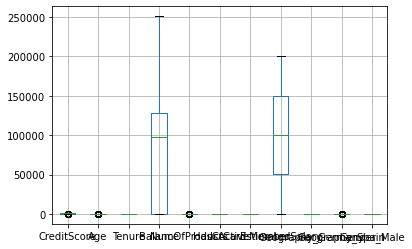

In [12]:
X.boxplot()

In [13]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [14]:
X.duplicated().sum()

0

In [15]:
import seaborn as sns

# scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [17]:
scaler =StandardScaler()



In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [20]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [21]:
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]=scaler.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [22]:
    X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]=scaler.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
    X_test=pd.DataFrame(X_test)
    X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,-0.561294,-0.394017,0.986971,0.859622,-0.873377,1,1,1.621859,1,0,0
898,-1.338478,0.076114,-1.084321,0.403122,-0.873377,1,0,0.504204,0,0,0
2398,0.583476,0.264167,0.986971,0.280118,-0.873377,1,1,-0.418656,0,1,0
5906,1.444679,-0.676096,-0.393891,0.550977,-0.873377,0,0,-0.181079,0,0,1
2343,0.583476,-0.111938,-0.048675,1.377783,0.801363,1,1,0.625465,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.267225,-1.428306,-1.429537,-1.267641,0.801363,1,1,1.414827,0,0,0
2899,-0.676822,-0.394017,0.641755,-1.267641,0.801363,1,0,-0.505273,0,0,0
9549,-0.760841,-0.299991,-1.429537,1.284209,0.801363,1,0,0.727752,0,1,1
2740,-0.004663,-0.488043,-0.393891,1.042848,-0.873377,1,1,-1.541629,1,0,1


In [23]:
zeros=y_test.value_counts()[0]
zeros

1595

In [24]:
null_acc=zeros/y_test.count()

In [25]:
null_acc

0.7975

logestique regression 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report

In [67]:
reg=LogisticRegression()

In [68]:
reg.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred=reg.predict(X_test)

In [70]:
print('CM : \n',confusion_matrix(y_test,y_pred))

CM : 
 [[1536   59]
 [ 314   91]]


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.61      0.22      0.33       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
reg.predict_proba(X_test)

array([[0.79508382, 0.20491618],
       [0.66167538, 0.33832462],
       [0.85892549, 0.14107451],
       ...,
       [0.8014315 , 0.1985685 ],
       [0.87626883, 0.12373117],
       [0.7695105 , 0.2304895 ]])

In [74]:
y_pred_n=reg.predict_proba(X_test)[:,1]>=0.6

In [75]:
y_pred_new=y_pred_n.astype(int)

In [76]:
y_pred_new

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
confusion_matrix(y_test,y_pred_n)

array([[1570,   25],
       [ 357,   48]], dtype=int64)

In [78]:
#sensitivite par rapport specificite

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve



In [80]:
ns_fpr, ns_tpr, threshwold = roc_curve(y_test, reg.predict_proba(X_test)[:,1])

Text(0.5, 0, '1-FPR')

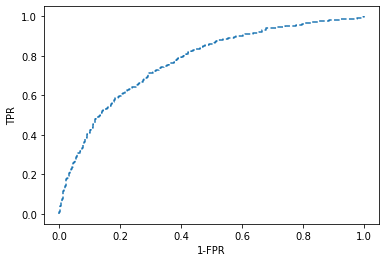

In [81]:
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.ylabel("TPR")
plt.xlabel("1-FPR")


C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


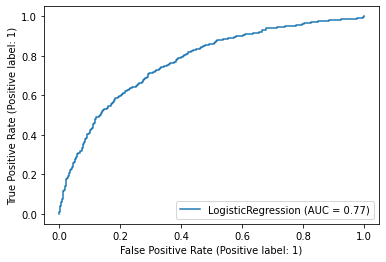

In [79]:
plot_roc_curve(reg,X_test,y_test)

# KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [84]:
y_pred_knn=knn.predict(X_test)

In [85]:
print('CM knn : \n',confusion_matrix(y_test,y_pred_knn))

CM knn : 
 [[1508   87]
 [ 226  179]]


In [86]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.67      0.44      0.53       405

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [87]:
ns_fprk, ns_tprk, threshwold = roc_curve(y_test, knn.predict_proba(X_test)[:,1])


Text(0.5, 0, '1-FPR')

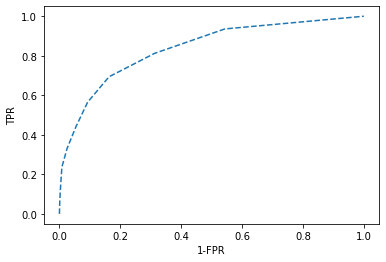

In [88]:
plt.plot(ns_fprk, ns_tprk, linestyle='--')
plt.ylabel("TPR")
plt.xlabel("1-FPR")


gridsearch

In [89]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [3,5,7,9]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring = 'accuracy',\
                   cv = 5)
grille = clf.fit(X_train,y_train)

In [90]:
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 9}
0.8456250000000001


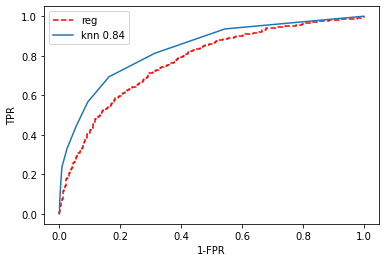

In [91]:
plt.plot(ns_fpr, ns_tpr, linestyle='--',color='r',label="reg")
plt.plot(ns_fprk, ns_tprk, label='knn {:.2f}'.format(metrics.auc(ns_fprk,ns_tprk)))
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()



In [ ]:
#knn est meilleur que logreg

In [42]:
from sklearn import metrics

In [123]:
metrics.auc(ns_fprk,ns_tprk)

0.8370842524865514

In [128]:
from sklearn.metrics import roc_auc_score
ns_auc = roc_auc_score(y_test, y_pred)


# SVM

In [59]:
from sklearn.svm import SVC
svr = SVC(random_state=0,probability=True)

In [60]:
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
print(f'MSE = {mean_squared_error(y_test,y_pred_svr)}')
print(f'MAE = {mean_absolute_error(y_test,y_pred_svr)}')


MSE = 0.1315
MAE = 0.1315


In [62]:
confusion_matrix(y_test,y_pred_svr)

array([[1561,   34],
       [ 229,  176]], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred_svr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.84      0.43      0.57       405

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.87      0.87      0.85      2000



In [93]:
ns_fprs, ns_tprs, threshwold = roc_curve(y_test, svr.predict_proba(X_test)[:,1])

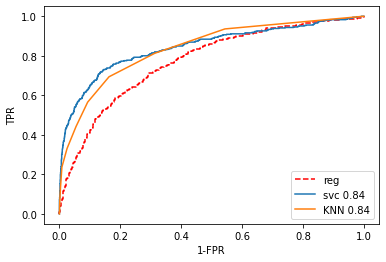

In [96]:
plt.plot(ns_fpr, ns_tpr, linestyle='--',color='r',label="reg")
plt.plot(ns_fprs, ns_tprs, label='svc {:.2f}'.format(metrics.auc(ns_fprs,ns_tprs)))
plt.plot(ns_fprk, ns_tprk, label='KNN {:.2f}'.format(metrics.auc(ns_fprk,ns_tprk)))
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()


In [98]:
svr = SVC(kernel='rbf',random_state=0,probability=True)

In [99]:
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

In [100]:
print(f'MSE = {mean_squared_error(y_test,y_pred_svr)}')
print(f'MAE = {mean_absolute_error(y_test,y_pred_svr)}')


MSE = 0.1315
MAE = 0.1315


In [101]:
confusion_matrix(y_test,y_pred_svr)

array([[1561,   34],
       [ 229,  176]], dtype=int64)

In [102]:
ns_fprsrbf, ns_tprsrbf, threshwold = roc_curve(y_test, svr.predict_proba(X_test)[:,1])

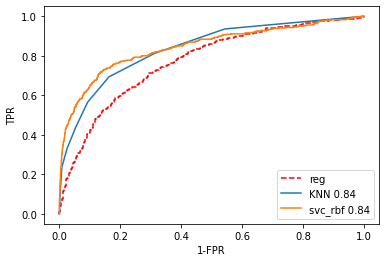

In [105]:
plt.plot(ns_fpr, ns_tpr, linestyle='--',color='r',label="reg")

plt.plot(ns_fprk, ns_tprk, label='KNN {:.2f}'.format(metrics.auc(ns_fprk,ns_tprk)))
plt.plot(ns_fprsrbf, ns_tprsrbf, label='svc_rbf {:.2f}'.format(metrics.auc(ns_fprsrbf,ns_tprsrbf)))
plt.ylabel("TPR")
plt.xlabel("1-FPR")
plt.legend()
plt.show()


# Arbre de decision

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( random_state=0)


In [127]:
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [129]:
print('CM dt : \n',confusion_matrix(y_test,y_pred_dt))
print('Acc dt : {}'.format(accuracy_score(y_test,y_pred_dt)))

CM dt : 
 [[1376  219]
 [ 170  235]]
Acc dt : 0.8055


In [130]:
ns_fprdt, ns_tprdt, threshwold = roc_curve(y_test, dt.predict_proba(X_test)[:,1])

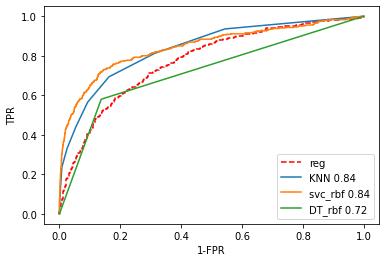

In [131]:
plt.plot(ns_fpr, ns_tpr, linestyle='--',color='r',label="reg")

plt.plot(ns_fprk, ns_tprk, label='KNN {:.2f}'.format(metrics.auc(ns_fprk,ns_tprk)))
plt.plot(ns_fprsrbf, ns_tprsrbf, label='svc_rbf {:.2f}'.format(metrics.auc(ns_fprsrbf,ns_tprsrbf)))
plt.plot(ns_fprdt, ns_tprdt, label='DT_rbf {:.2f}'.format(metrics.auc(ns_fprdt,ns_tprdt)))
plt.ylabel("TPR")
plt.xlabel("1-FPR")
plt.legend()
plt.show()


In [136]:
import graphviz
!pip install pydot


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [153]:
tree.export_graphviz(model,feature_names = cols,
                    out_file = 'dt.dot',\
                    filled = True,\
                    rounded = True)

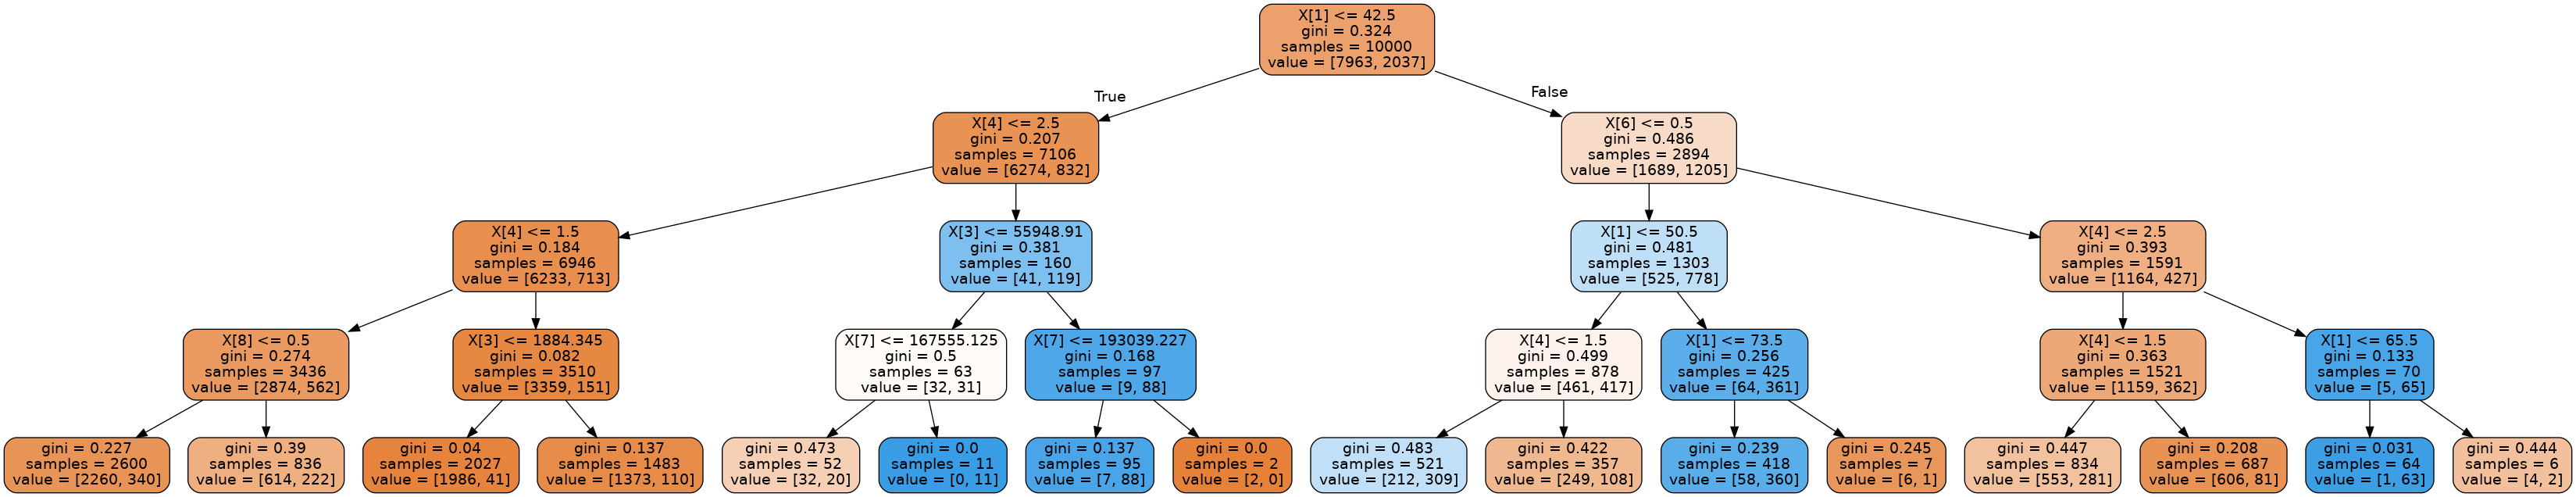

In [158]:
from IPython.display import Image
Image('dt-1.jpg')

In [155]:
cols=X.columns

In [156]:
cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

# random forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier( random_state=0,max_depth=20,n_estimators=100)


In [165]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [166]:
print('CM dt : \n',confusion_matrix(y_test,y_pred_rf))
print('Acc dt : {}'.format(accuracy_score(y_test,y_pred_rf)))

CM dt : 
 [[1528   67]
 [ 196  209]]
Acc dt : 0.8685


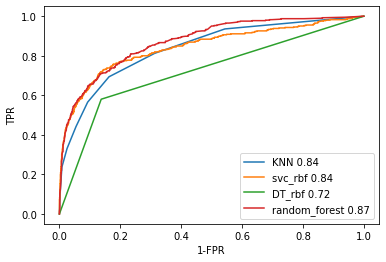

In [168]:
ns_fprf, ns_tprf, threshwold = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(ns_fprk, ns_tprk, label='KNN {:.2f}'.format(metrics.auc(ns_fprk,ns_tprk)))
plt.plot(ns_fprsrbf, ns_tprsrbf, label='svc_rbf {:.2f}'.format(metrics.auc(ns_fprsrbf,ns_tprsrbf)))
plt.plot(ns_fprdt, ns_tprdt, label='DT_rbf {:.2f}'.format(metrics.auc(ns_fprdt,ns_tprdt)))
plt.plot(ns_fprf, ns_tprf, label='random_forest {:.2f}'.format(metrics.auc(ns_fprf,ns_tprf)))
plt.ylabel("TPR")
plt.xlabel("1-FPR")
plt.legend()
plt.show()


# feature selection avec random forest

In [183]:
degre=rf.feature_importances_
degre

array([0.14289995, 0.23712544, 0.07871643, 0.14566596, 0.13239727,
       0.01878074, 0.03689151, 0.1476754 , 0.02717515, 0.0141362 ,
       0.01853595])

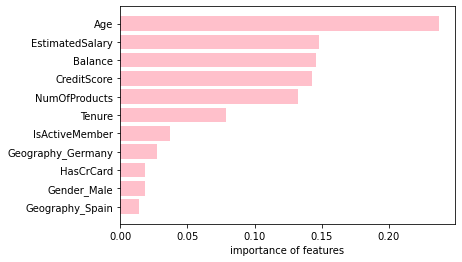

In [187]:
indx=np.argsort(degre)  
plt.barh(range(len(indx)),degre[indx], color ='pink') 

plt.xlabel("importance of features") 
plt.yticks(range(len(indx)),[cols[i] for i in indx]) 
plt.show() 